***

<h1><p style="text-align: center; font-weight:bold;"><span style="color:#831CE3">  E.D.A. of a Air Quality Dataset India</span></p> </h1>


***


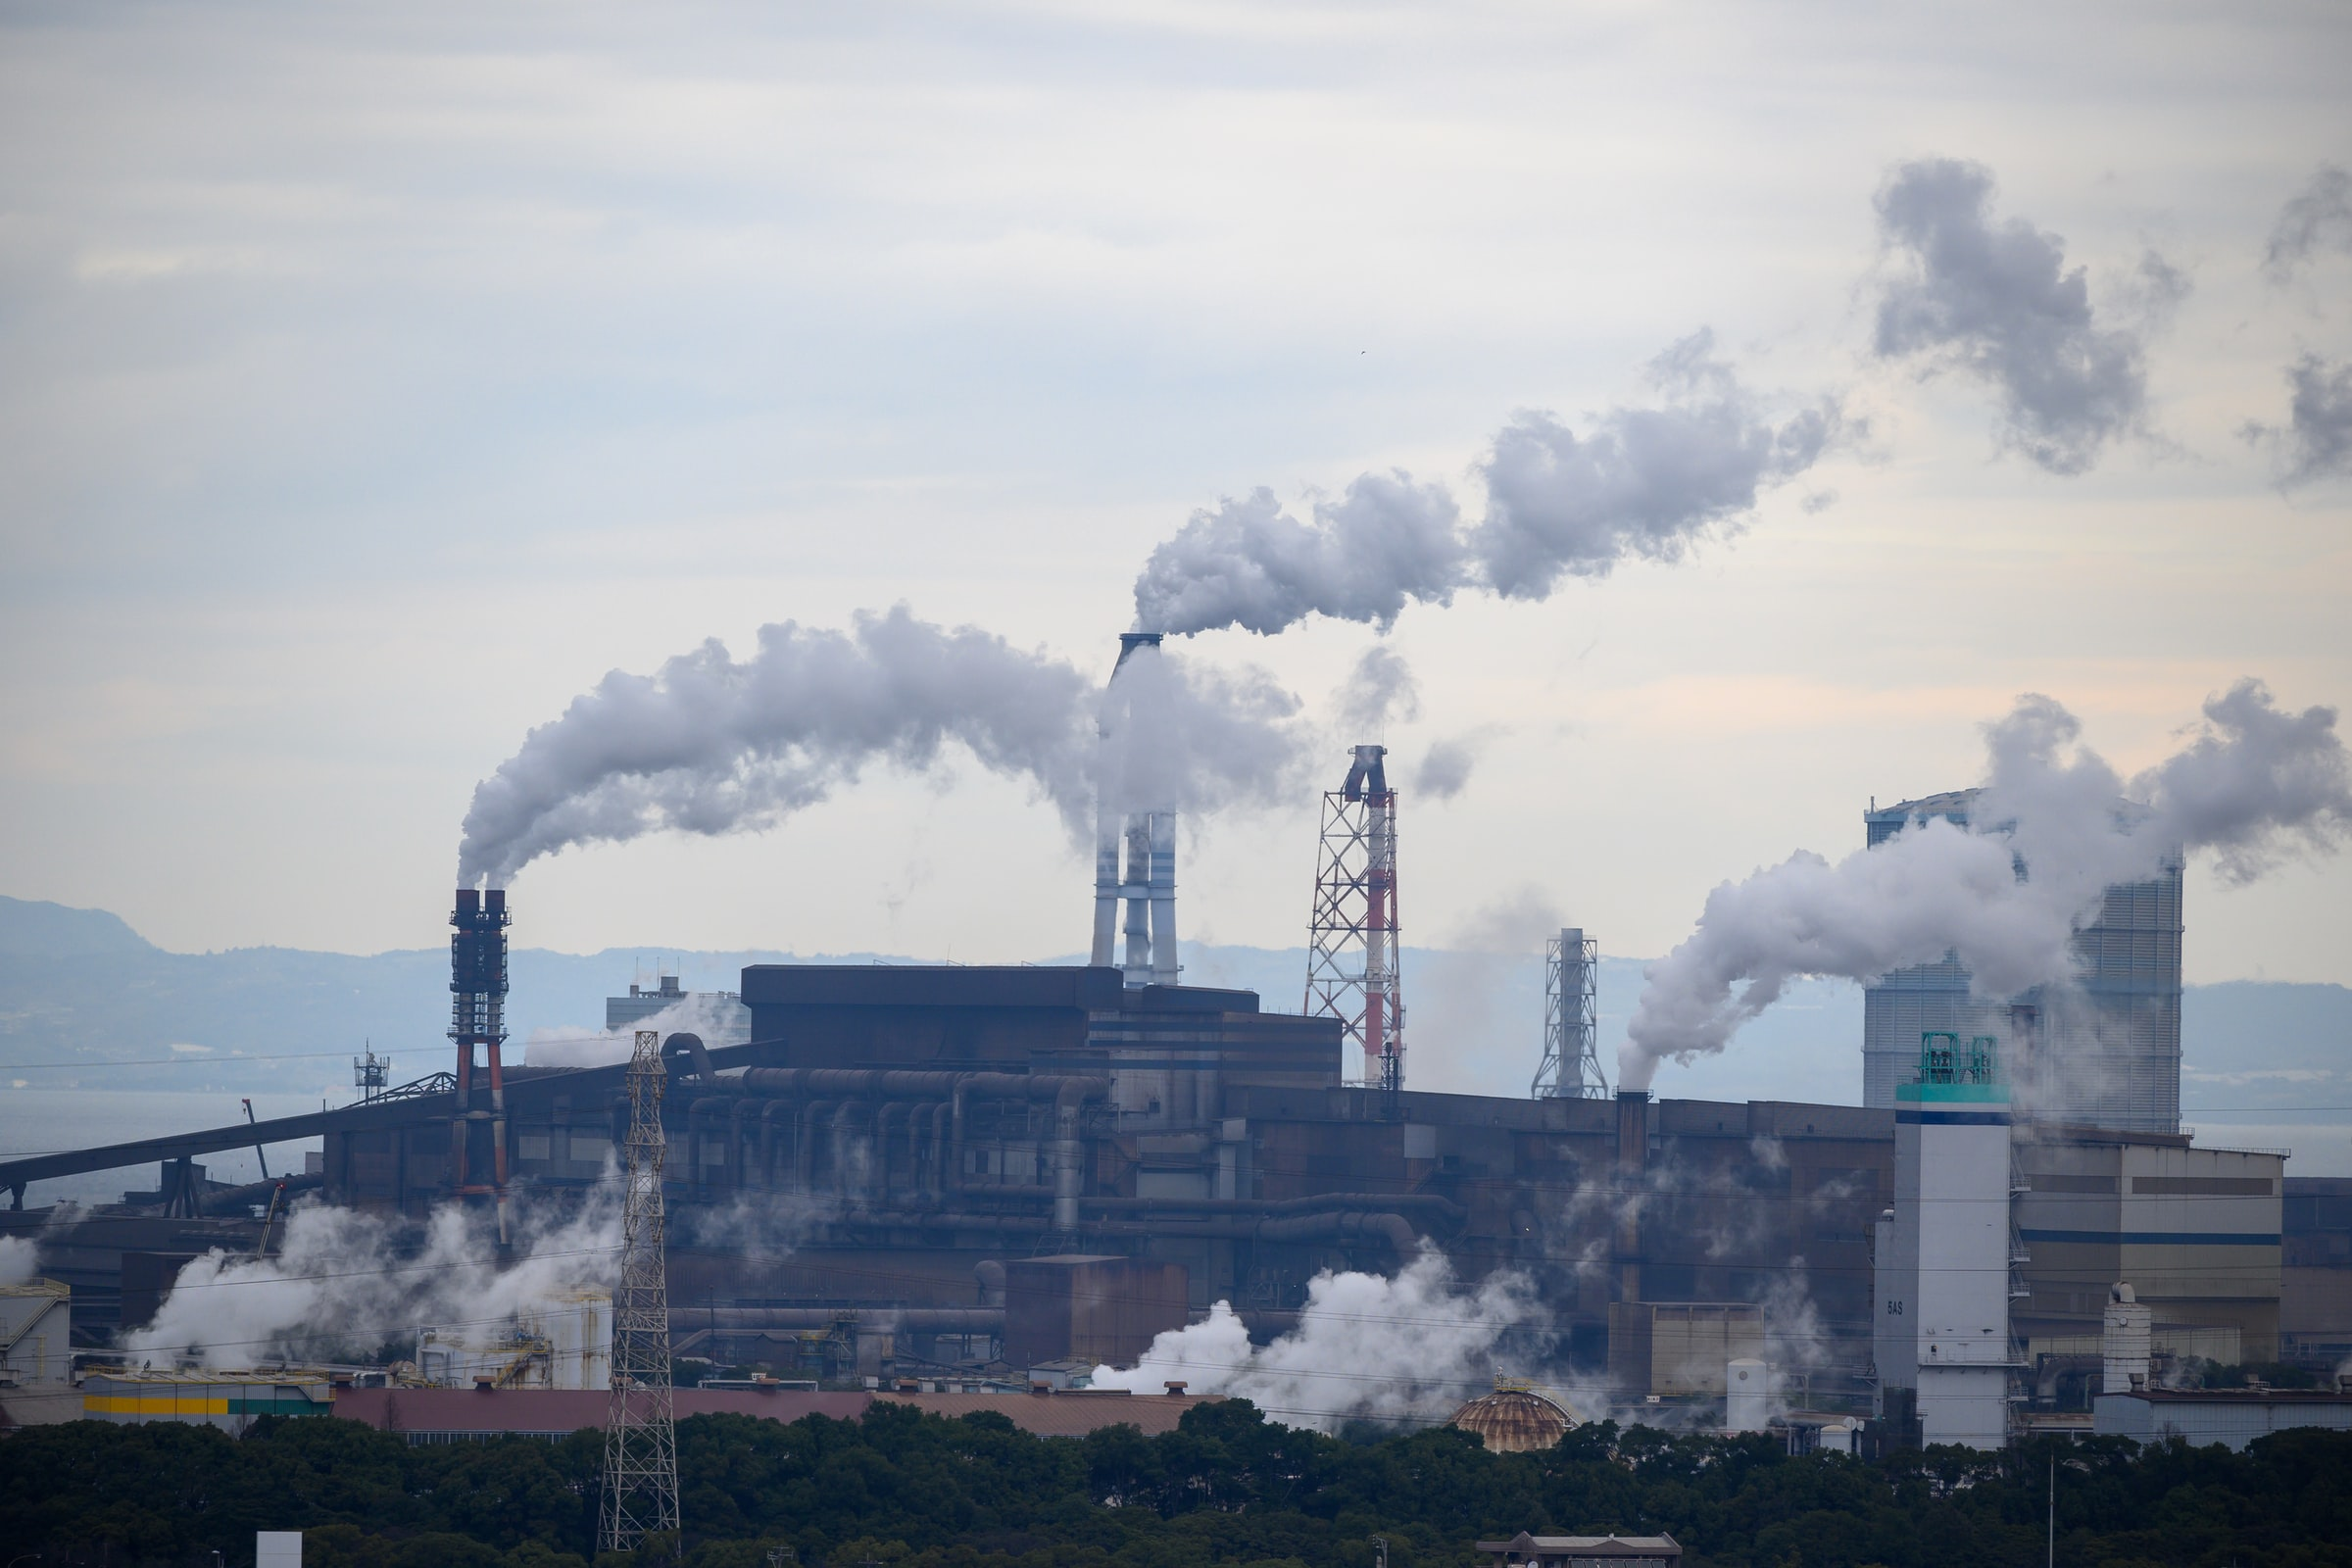

In this Exploratory Data Analysis, we'll use the **Air Quality Data in India (2015 - 2020) Dataset** from Kaggle consisting of AQI data published by CPCB for 5 years, from ***January, 2015*** till ***July, 2020***. <br/><br/>

We'll explore the changes in AQI and various pollutant levels in pre-COVID and post-COVID period.
List out the most polluted and least polluted cities w.r.t. Vehicular Pollution and Industrial Pollution. 

<br/>


# Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 746.5 kB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
df=pd.read_csv('../input/air-quality-data-in-india/city_day.csv',parse_dates=['Date'])
raw_df = df

### Converting dates to Pandas datetime format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

<AxesSubplot:>

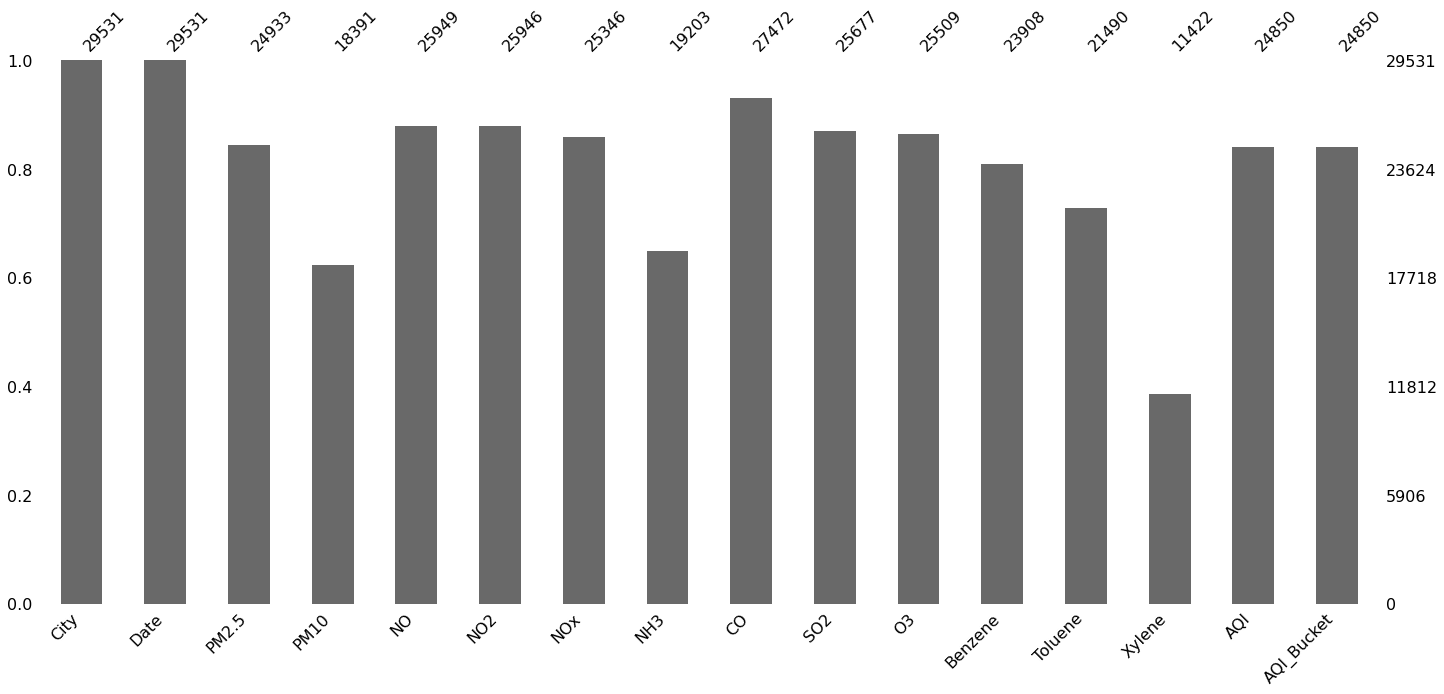

In [5]:
msno.bar(df)

<AxesSubplot:>

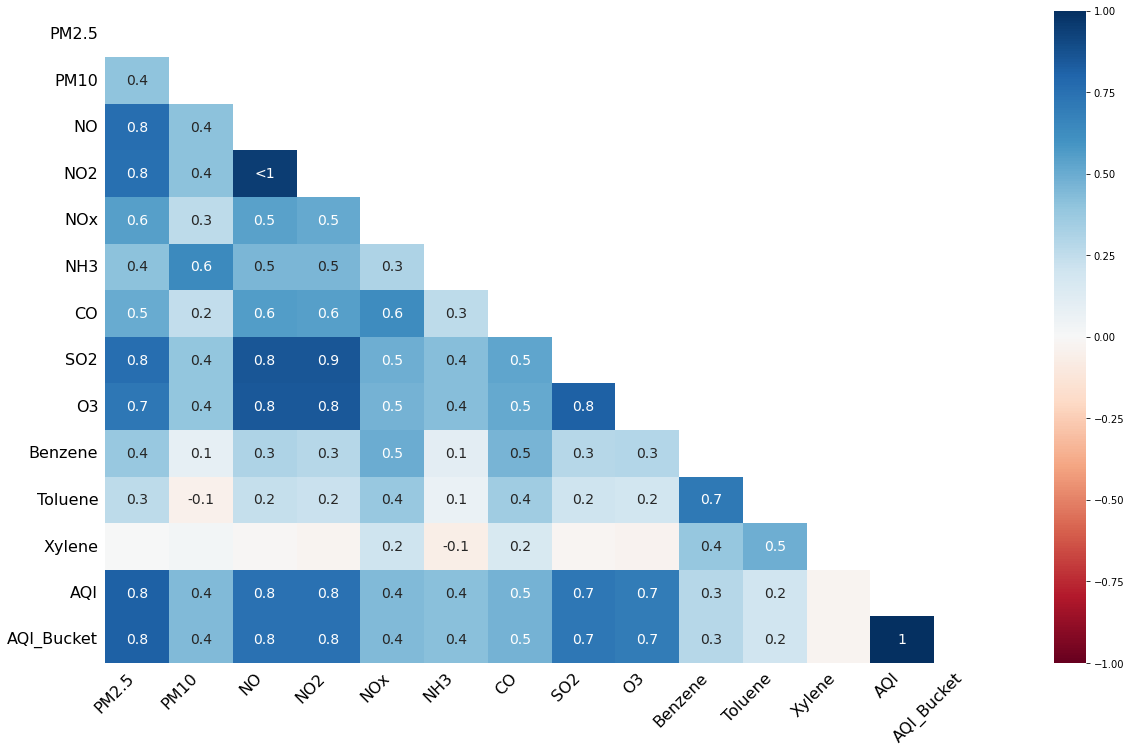

In [6]:
msno.heatmap(df)

In [7]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

df1 = df
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

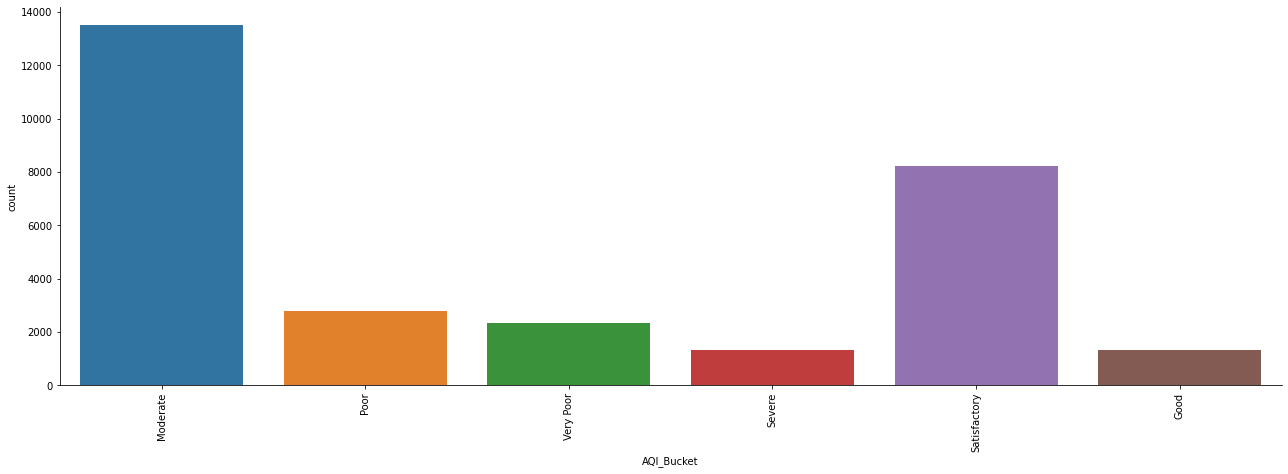

In [9]:
plot1 = sns.catplot(x="AQI_Bucket",data=df1,kind="count",height=6,aspect=3)
plot1.set_xticklabels(rotation=90)

# Pre-Covid

### Divide the data set into two parts: 
* Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) 
* Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) 
and find how these contents correlated with AQI (air quality index)


In [10]:
df = df[df['Date'] <= ('25-03-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26983 entries, 0 to 29432
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          26983 non-null  object        
 1   Date                          26983 non-null  datetime64[ns]
 2   AQI                           26983 non-null  float64       
 3   AQI_Bucket                    26983 non-null  object        
 4   Vehicular Pollution content   26983 non-null  float64       
 5   Industrial Pollution content  26983 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


In [11]:
df.head()

,City,Date,AQI,AQI_Bucket,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,2015-01-01,118.0,Moderate,197.31,161.02
1,Ahmedabad,2015-01-02,118.0,Moderate,194.19,71.56
2,Ahmedabad,2015-01-03,118.0,Moderate,243.90,85.22
3,Ahmedabad,2015-01-04,118.0,Moderate,199.95,70.24
4,Ahmedabad,2015-01-05,118.0,Moderate,263.48,107.32


In [12]:
# Most Polluted Cities 
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [13]:
# Least Polluted Cities 
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

## Satisfaction levels pre-COVID

In [14]:
df = df1.copy()
def al(var):
    cities = [var]
    filtered_city_day = df[df['Date'] <= '2020-03-25']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
c66 = al('Chennai')
df = pd.concat([c11,c22,c33,c44,c55,c66],axis=1)
df.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

# Post-COVID

In [15]:
df = df1.copy()
df = df[df['Date'] > ('25-03-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 1911 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          2548 non-null   object        
 1   Date                          2548 non-null   datetime64[ns]
 2   AQI                           2548 non-null   float64       
 3   AQI_Bucket                    2548 non-null   object        
 4   Vehicular Pollution content   2548 non-null   float64       
 5   Industrial Pollution content  2548 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 139.3+ KB


In [16]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [17]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var ,linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

## Satisfaction levels post-COVID

In [18]:
df = df1.copy()
def al(var):
    cities = [var]
    filtered_city_day = df[df['Date'] > '2020-03-25']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
c66 = al('Chennai')
df_row = pd.concat([c11,c22,c33,c44,c55,c66],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

# Preparing Data for Classification

In [19]:
df = df1.copy()
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
categorical_attributes

['City', 'AQI_Bucket']

In [20]:
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
df['AQI_Bucket']=le.fit_transform(df['AQI_Bucket'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  int64         
dtypes: datetime64[ns](1), 

In [21]:
y = df["AQI_Bucket"]
x = df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 10749, 3: 6650, 2: 2203, 5: 1854, 4: 1089, 0: 1079})


In [23]:
df.AQI_Bucket.unique()

array([1, 2, 5, 4, 3, 0])

In [24]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,1
1,0,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,1
2,0,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,1
3,0,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,1
4,0,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,1


### Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [25]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 10749, 1: 10749, 2: 10749, 4: 10749, 0: 10749, 5: 10749})


### Setting up the model

# 1. SVM

In [26]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
accuracy=accuracy_score(y_test,svmpred)*100
print("Accuracy = ",accuracy)

Accuracy =  96.2417470797359


In [27]:
cm=confusion_matrix(y_test,svmpred)
print("Confusion matrix\n")
print(cm)

Confusion matrix

[[ 262    0    0    0    0    0]
 [   0 2650   53   58    0    0]
 [   0    0  564    0    0   14]
 [  86    1    0 1487    0    0]
 [   0    0    0    0  247    2]
 [   0    0    2    0    6  475]]


# 2. XGBoost

In [28]:
gbc=XGBClassifier(learning_rate =0.001,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
print("Accuracy = ",accuracy)

Accuracy =  100.0


In [29]:
xgb_conf_matrix = confusion_matrix(y_test, pred)
print("Confusion matrix\n")
print(xgb_conf_matrix)

Confusion matrix

[[ 262    0    0    0    0    0]
 [   0 2761    0    0    0    0]
 [   0    0  578    0    0    0]
 [   0    0    0 1574    0    0]
 [   0    0    0    0  249    0]
 [   0    0    0    0    0  483]]


# Conclusion :

## Pre-COVID Lockdown

* Ahmedabad has max Industrial Pollution
* Delhi has max Vehicular Pollution

* Thiruvananthapuram has min Industrial Pollution
* Chennai has min Vehicular Pollution

* Majority of the cities had "Moderate" satisfaction level for breatheable Air

## Post-COVID Lockdown

* Ahmedabad has max Industrial Pollution
* Patna has max Vehicular Pollution

* Hyderabad has min Industrial Pollution
* Guwahati has min Vehicular Pollution

* Majority of the cities had "Satisfactory" satisfaction level for breatheable Air





* After COVID19 pandemic there is gradual dicrease in vehicular pollution contents and a significant decrease in industrial pollution content.
* Extra Gradient Boost classifier 100% accurately classify the target variable.